## Problem Statement

An engineer at a power generation plant anticipates that power generated in the plant can be calculated only from ambient variables of the plant i.e. without knowledge of the machines and their efficiencies. He has data of ambient variables and electricity generated for several days, so to check if his anticipations are correct he asks you to predict Net daily generated electrical energy (E) MW for 200 days. 

The ambient variables of the power plant are:

Temperature (T) in °C
<br>Ambient Pressure (P) in millibar
<br>Relative Humidity (RH)
<br>Exhaust Vacuum (V) in cm Hg

The training data includes ambient variables along with Net daily electrical energy (E) MW.

In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
import statsmodels.formula.api as sm

In [48]:
pd.options.display.max_columns=80

In [49]:
data=pd.read_csv("Electricity_Production/train_data.csv")

In [50]:
data.head()

,T,V,P,RH,E
0,273.39,420.12,91.84,57.41,1778.12
1,195.26,248.88,92.29,35.21,1824.16
2,377.52,360.42,92.31,27.69,1761.72
3,171.60,244.98,91.61,56.99,1889.64
4,222.56,353.70,92.43,54.25,1806.68


In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(with_std=False)

In [52]:
data=scaler.fit_transform(data)

In [55]:
def calculate_vif(x):
    thresh = 10.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)
train_out = calculate_vif(pd.DataFrame(data[:,:-1]))

Iteration no.
1
[5.91751189656475, 3.96026393892364, 1.4434566824596824, 1.6658902726010563]
Max VIF is for variable no.:
0


In [56]:
lm2 = sm.OLS(data[:,-1],data[:,:-1]).fit()

In [57]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     6482.
Date:                Tue, 17 Apr 2018   Prob (F-statistic):               0.00
Time:                        09:37:12   Log-Likelihood:                -8596.3
No. Observations:                2000   AIC:                         1.720e+04
Df Residuals:                    1996   BIC:                         1.722e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5964      0.010    -58.561      0.000      -0.616      -0.576
x2            -0.1625      0.010    -15.627      0.000      -0.183      -0.142
x3             2.1803      0.888      2.455      0.014       0.439       3.922
x4            -1.0254      0.059    -17.490      0.000      -1.140      -0.910
==============================================================================
Omnibus:                      193.445   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              888.329
Skew:                          -0.350   Prob(JB):                    1.26e-193
Kurtosis:                       6.189   Cond. No.                         262.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
influence = lm2.get_influence()  
resid_student = influence.resid_studentized_external

In [59]:
resid=pd.DataFrame(data[:,:-1])
resid["Studentized Residuals"]=resid_student
resid.head()

,0,1,2,3,Studentized Residuals
0,17.37918,94.90242,-0.271935,13.24036,0.057265
1,-60.75082,-76.33758,0.178065,-8.95964,-2.875568
2,121.50918,35.20242,0.198065,-16.47964,0.310358
3,-84.41082,-80.23758,-0.501935,12.82036,1.317905
4,-33.45082,28.48242,0.318065,10.08036,-0.901526


In [60]:
ind = resid.loc[np.absolute(resid["Studentized Residuals"]) > 3.5,:].index
ind

Int64Index([71, 83, 228, 274, 808, 1749], dtype='int64')

# Solution

In [61]:
data=pd.read_csv("Electricity_Production/train_data.csv")

In [62]:
data=pd.DataFrame(data).drop(ind,axis = 0)

In [63]:
data.reset_index(drop=True,inplace=True)

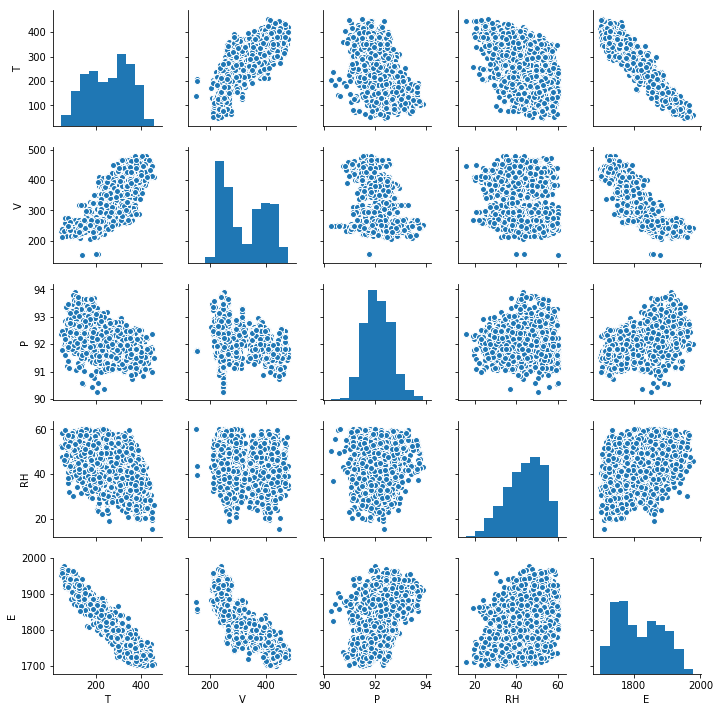

In [66]:
sns.pairplot(data,size=2)
plt.show()

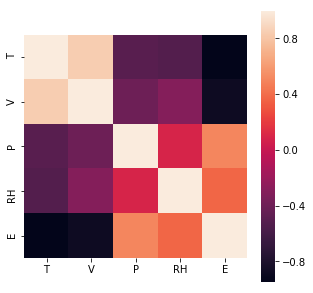

In [67]:
plt.figure(figsize=(5,5))
corr_mat=data.corr()
sns.heatmap(corr_mat,square=True)
plt.show()

In [68]:
scaler_X=StandardScaler(with_std=False)

In [69]:
scaler_y=StandardScaler(with_std=False)

In [70]:
X_train=scaler_X.fit_transform(data[data.columns[:-1]])

In [71]:
y_train=scaler_y.fit_transform(data[data.columns[-1]].reshape(-1,1))

In [455]:
from sklearn.model_selection import cross_val_score

In [456]:
from sklearn.linear_model import LinearRegression

In [457]:
lin=LinearRegression(normalize=False)

In [581]:
cross_val_score(estimator=lin,X=X_train,y=y_train,scoring='r2',cv=3).mean()

0.93401241005893054

In [459]:
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [460]:
from sklearn.linear_model import Lasso

In [461]:
lasso=Lasso(random_state=0,alpha=.1,normalize=False)

In [463]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [582]:
cross_val_score(estimator=lasso,X=X_train,y=y_train,scoring='r2',cv=3).mean()

0.93400795061520492

In [466]:
from sklearn.linear_model import Ridge

In [467]:
ridge=Ridge(alpha=.001,random_state=0,normalize=True)

In [583]:
cross_val_score(estimator=ridge,X=X_train,y=y_train,scoring='r2',cv=3).mean()

0.9340062455527699

In [469]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=0, solver='auto', tol=0.001)

In [470]:
from sklearn.ensemble import RandomForestRegressor

In [471]:
rm=RandomForestRegressor(random_state=0)

In [584]:
cross_val_score(estimator=rm,X=X_train,y=y_train,scoring='r2',cv=3).mean()

0.94666982961083723

In [473]:
rm.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [474]:
from sklearn.ensemble import GradientBoostingRegressor

In [475]:
gbm=GradientBoostingRegressor(random_state=0)

In [585]:
cross_val_score(estimator=gbm,X=X_train,y=y_train,scoring='r2',cv=3).mean()

0.9499684339250446

In [477]:
gbm.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

#### Parameter Tuning of Gradient Boosting Algorithm

In [478]:
from sklearn.grid_search import GridSearchCV

In [481]:
params={"n_estimators":(60,70,80,90,95,100,105,110,115,120,130)}

gsearch=GridSearchCV(cv=3,estimator=GradientBoostingRegressor(random_state=0,learning_rate=0.1, min_samples_split=10,min_samples_leaf=2,max_depth=8,max_features='sqrt',subsample=0.8),scoring="r2",param_grid=params,n_jobs=-1)

gsearch.fit(X_train,y_train)

print(gsearch.best_params_)
print(gsearch.best_score_)

{'n_estimators': 95}
0.9532693891238202


In [485]:
params={"max_depth":(4,5,6,7,8,9,10),"min_samples_split":(12,14,16,18,20,22,24,26,28),"min_samples_leaf":(2,3,4,5,6,8)}

gsearch1=GridSearchCV(cv=3,estimator=GradientBoostingRegressor(n_estimators=95,random_state=0,learning_rate=0.1,max_features='sqrt',subsample=0.8),scoring="r2",param_grid=params,n_jobs=-1)

gsearch1.fit(X_train,y_train)

print(gsearch1.best_params_)
print(gsearch1.best_score_)

{'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 3}
0.9540959156260437


In [487]:
params={"max_features":(2,3,4)}

gsearch2=GridSearchCV(cv=3,estimator=GradientBoostingRegressor(n_estimators=95,random_state=0,learning_rate=0.1, min_samples_split=20,min_samples_leaf=3,max_depth=7,subsample=0.8),scoring="r2",param_grid=params,n_jobs=-1)

gsearch2.fit(X_train,y_train)

print(gsearch2.best_params_)
print(gsearch2.best_score_)

{'max_features': 2}
0.9540959156260437


In [488]:
params={"subsample":(.5,.6,.75,0.8,0.85,.9)}

gsearch3=GridSearchCV(cv=3,estimator=GradientBoostingRegressor(n_estimators=95,random_state=0,learning_rate=0.1, min_samples_split=20,min_samples_leaf=3,max_depth=7,max_features=2),scoring="r2",param_grid=params,n_jobs=-1)

gsearch3.fit(X_train,y_train)

print(gsearch3.best_params_)
print(gsearch3.best_score_)

{'subsample': 0.8}
0.9540959156260437


In [489]:
params={"learning_rate":(.1,.05,.01,.005,.001,.0005,.0001),"n_estimators":(90,180,360,720,1440,2880,2880*2)}

gsearch3=GridSearchCV(cv=3,estimator=GradientBoostingRegressor(random_state=0, min_samples_split=20,min_samples_leaf=3,max_depth=7,max_features=2,subsample=0.8),scoring="r2",param_grid=params,n_jobs=-1)

gsearch3.fit(X_train,y_train)

print(gsearch3.best_params_)
print(gsearch3.best_score_)

{'n_estimators': 2880, 'learning_rate': 0.005}
0.9555617473612292


In [490]:
final_gbm=GradientBoostingRegressor(random_state=0, min_samples_split=20,min_samples_leaf=3,max_depth=7,max_features=2,subsample=0.8,n_estimators=2880,learning_rate=0.005)

In [546]:
cross_val_score(estimator=final_gbm,X=X_train,y=y_train,scoring='r2',cv=3).mean()

0.95548015684615561

In [492]:
final_gbm.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.005, loss='ls', max_depth=7, max_features=2,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=20, min_weight_fraction_leaf=0.0,
             n_estimators=2880, presort='auto', random_state=0,
             subsample=0.8, verbose=0, warm_start=False)

#### Parameter Tuning of XGBoost Algorithm

In [493]:
from xgboost import XGBRegressor

In [494]:
xgb=XGBRegressor(seed=27)

In [495]:
cross_val_score(estimator=xgb,X=X_train,y=y_train,scoring='r2',cv=3)

array([ 0.95057603,  0.94795459,  0.95146734])

In [502]:
params={"n_estimators":(300,325,350,375,395,400,405,425,450,475,500,525,550)}

xgsearch=GridSearchCV(cv=3,estimator=XGBRegressor(learning_rate =0.1, max_depth=5,min_child_weight=1,gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1, seed=27),scoring="r2",param_grid=params,n_jobs=-1)

xgsearch.fit(X_train,y_train)

print(xgsearch.best_params_)
print(xgsearch.best_score_)

{'n_estimators': 400}
0.9539553648312867


In [504]:
param_test2 = {
 'max_depth':(1,2,3,4,5,6,7,8,10),
 'min_child_weight':(1,2,3,4,6,8,10)
}
xgsearch2 = GridSearchCV(estimator = XGBRegressor( n_estimators=400,learning_rate =0.1,gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test2, scoring='r2',n_jobs=-1,iid=False, cv=3)
xgsearch2.fit(X_train,y_train)
print(xgsearch2.best_params_)
print(xgsearch2.best_score_)

{'max_depth': 4, 'min_child_weight': 3}
0.9547815999287047


In [505]:
param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
xgsearch3 = GridSearchCV(estimator = XGBRegressor(learning_rate=0.1, n_estimators=400, max_depth=4,
min_child_weight=3, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1,seed=27), 
param_grid = param_test3, scoring='r2',n_jobs=4,iid=False, cv=3)
xgsearch3.fit(X_train,y_train)
print(xgsearch3.best_params_)
print(xgsearch3.best_score_)

{'gamma': 0.2}
0.9547896148894243


In [506]:
param_test4 = {
 'subsample':(.75,.8,.85,.90),
 'colsample_bytree':(.5,.55,.6,.65,.7,.75,.8,.9)
}
xgsearch4 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=400, max_depth=4,gamma=0.2,
min_child_weight=3, nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='r2',n_jobs=4,iid=False, cv=3)
xgsearch4.fit(X_train,y_train)
print(xgsearch4.best_params_)
print(xgsearch4.best_score_)

{'colsample_bytree': 0.75, 'subsample': 0.8}
0.9547896148894243


In [507]:
param_test5 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
xgsearch5 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=400, max_depth=4,gamma=0.2,colsample_bytree=.75,subsample=.8,
min_child_weight=3, nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='r2',n_jobs=4,iid=False, cv=3)
xgsearch5.fit(X_train,y_train)
print(xgsearch5.best_params_)
print(xgsearch5.best_score_)

{'reg_alpha': 1e-05}
0.9547896152670255


In [508]:
param_test6 = {"learning_rate":(.1,.05,.01,.005,.001,.0005,.0001),"n_estimators":(500,1000,2000,4000,8000)}
xgsearch5 = GridSearchCV(estimator = XGBRegressor(max_depth=4,gamma=0.2,colsample_bytree=.75,subsample=.8,
min_child_weight=3, nthread=4, scale_pos_weight=1,seed=27,reg_alpha=1e-05), 
 param_grid = param_test6, scoring='r2',n_jobs=4,iid=False, cv=3)
xgsearch5.fit(X_train,y_train)
print(xgsearch5.best_params_)
print(xgsearch5.best_score_)

{'n_estimators': 8000, 'learning_rate': 0.005}
0.9555914742619902


In [509]:
final_xgb=XGBRegressor(n_estimators=8000,learning_rate=.005,max_depth=4,gamma=0.2,colsample_bytree=.75,subsample=.8,
             min_child_weight=3, nthread=4, scale_pos_weight=1,seed=27,reg_alpha=.1)

In [545]:
cross_val_score(estimator=final_xgb,X=np.array(X_train),y=y_train,scoring='r2',cv=3).mean()

0.95554255011444855

In [536]:
final_xgb.fit(np.array(X_train),y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.75,
       gamma=0.2, learning_rate=0.005, max_delta_step=0, max_depth=4,
       min_child_weight=3, missing=None, n_estimators=8000, nthread=4,
       objective='reg:linear', reg_alpha=0.1, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

#### Stacking Models

In [577]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=3):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[train_index], y.iloc[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred.ravel()
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [592]:
stacked_averaged_models = StackingAveragedModels(base_models = (final_gbm,final_xgb),meta_model = lasso)

In [593]:
cross_val_score(estimator=stacked_averaged_models,X=pd.DataFrame(X_train),y=pd.DataFrame(y_train.ravel()),scoring='r2').mean()

0.95529766808457006

In [666]:
stacked_averaged_models.fit(X=pd.DataFrame(X_train),y=pd.DataFrame(y_train.ravel()))

StackingAveragedModels(base_models=(GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.005, loss='ls', max_depth=7, max_features=2,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_sam...near', reg_alpha=0.1, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)),
            meta_model=Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
            n_folds=3)


# Submission

In [40]:
test_data=pd.read_csv("Electricity_Production/test_data.csv")

In [72]:
test_data=scaler_X.transform(test_data)

#### Weighted Average Prediction

In [670]:
predictions=.5*final_xgb.predict(np.array(test_data))+.3*final_gbm.predict(np.array(test_data))+.2*lin.predict(np.array(test_data))

In [671]:
predictions=scaler_y.inverse_transform(predictions)

In [673]:
pd.DataFrame(predictions).to_csv("Electricity_Production/submission1.csv",header=None,index=None)

In [76]:
predictions=pd.read_csv("Electricity_Production/submission1.csv",header=None)

In [78]:
predictions.head()

,0
0,1799.789848
1,1818.333277
2,1899.645428
3,1909.880362
4,1797.736983
